### 利用GPT大型模型工具完成数据洞察
#### 本周以及下周的实验内容如下：
#### 请同学们参考《GPT数据科学系列课程实验手册》内容，并结合之前的作业经验，对截至2024年8月底在GitHub上具有协作行为日志数据的用户的个人信息（包括姓名、公司、邮箱及其地理位置等）进行数据洞察分析。数据获取链接为：https://github.com/X-lab2017/dase-2024-autumn/tree/main/HomeWork/data/user_data

### 实验目标
#### 培养数据处理与分析能力：通过实际操作，提升对大规模数据集的处理和分析能力。
#### 掌握GPT工具的应用：学习如何利用GPT大型模型工具辅助完成数据洞察任务。
#### 理解数据隐私与伦理：在处理包含个人信息的数据时，遵循数据隐私保护的原则和规范。

### 实验内容
#### 人口统计分析
#### 国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。
#### 城市级别分布：分析主要城市的开发者密度，发现技术热点区域。
#### 时区分布：了解用户的时区分布，分析不同地区用户的协作时间模式。

#### 协作行为分析
#### 提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。

#### 其他维度有趣的洞察（至少2个）

### 提交内容
#### 数据分析代码。
#### 最终的数据洞察报告（PDF格式）。

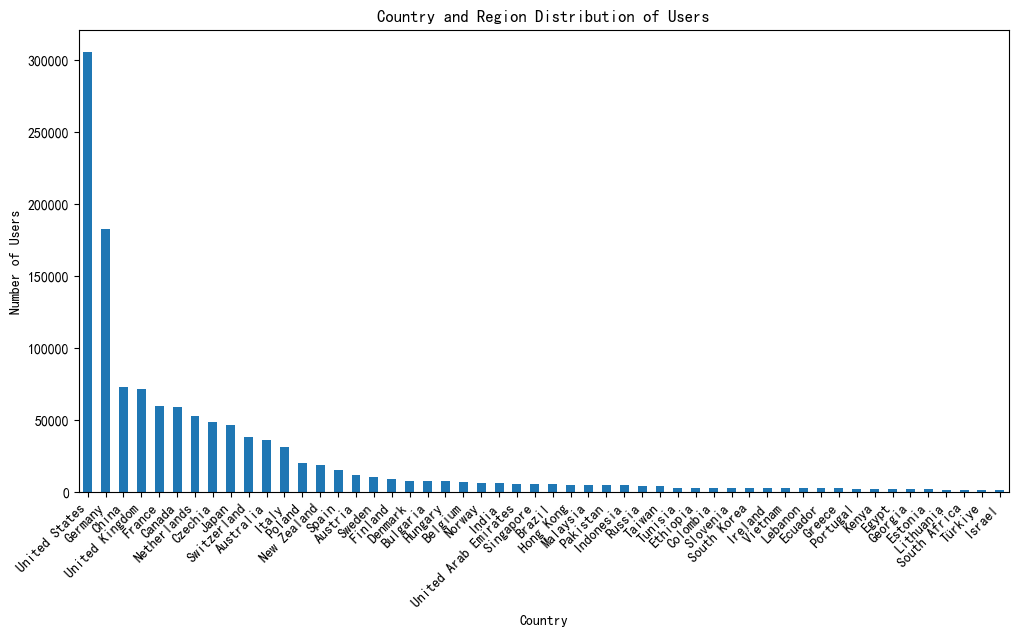

热力图已生成


In [5]:
# 国家级别

import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import geopandas as gpd

plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
# 读取上传的 labeled.csv 文件
file_path = 'data/users_combined_info_500.csv'
data = pd.read_csv(file_path)

# 国家和地区分布
country_distribution = data['country'].value_counts()

# 绘制国家和地区分布的柱状图
plt.figure(figsize=(12, 6))
country_distribution.plot(kind='bar')
plt.title('Country and Region Distribution of Users')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.show()

# 国家级别分布热力图
country_geo_path = 'data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
country_geo = gpd.read_file(country_geo_path)

# 聚合国家数据
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

# 合并国家数据与地理数据
country_geo = country_geo.merge(country_counts, how='left', left_on='ADMIN', right_on='country')

# 创建国家级别的热力图
m_country = folium.Map(location=[20, 0], zoom_start=2)
folium.Choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=country_counts,
    columns=['country', 'counts'],
    key_on='feature.properties.ADMIN',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='User Distribution by Country'
).add_to(m_country)

# 保存国家级别热力图
m_country.save('country_heatmap.html')

# 打印国家和地区分布的前几行数据
print("热力图已生成")




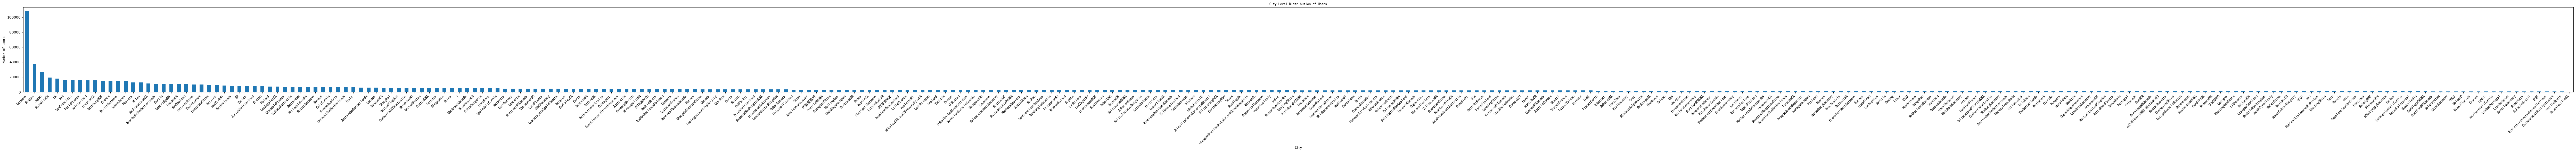

城市级别分布：
location
Germany       107747
Prague         37757
Japan          26986
PaloAltoCA     19215
UK             17789
Name: count, dtype: int64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import re

my_font = FontProperties(fname=r"c:\windows\fonts\SimHei.ttf")
# 读取上传的 labeled.csv 文件
file_path = 'data/users_combined_info_500.csv'
data = pd.read_csv(file_path)

# 清理 location 列中的特殊字符
data['location'] = data['location'].str.replace(r'[$]', '', regex=True)

# 数据预处理：去除可能会导致字体显示问题的地区名（例如含有特殊符号或非字母数字字符的地区）
data['location'] = data['location'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\u4e00-\u9fa5]', '', x))  # 只保留字母、数字和中文字符

# 城市级别分布
city_distribution = data['location'].value_counts()

# 绘制城市级别分布的柱状图
plt.figure(figsize=(100, 6))
city_distribution.plot(kind='bar')
plt.title('City Level Distribution of Users', usetex=False, fontproperties=my_font)  # 设置字体为 SimHei
plt.xlabel('City', usetex=False, fontproperties=my_font)  # 设置字体为 SimHei
plt.ylabel('Number of Users', usetex=False, fontproperties=my_font)  # 设置字体为 SimHei
plt.xticks(rotation=45, ha='right', fontsize=10, fontproperties=my_font)  # 设置横轴标签旋转和调整大小，并设置字体为 SimHei
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

# 打印城市级别分布的前几行数据
print("城市级别分布：")
print(city_distribution.head())


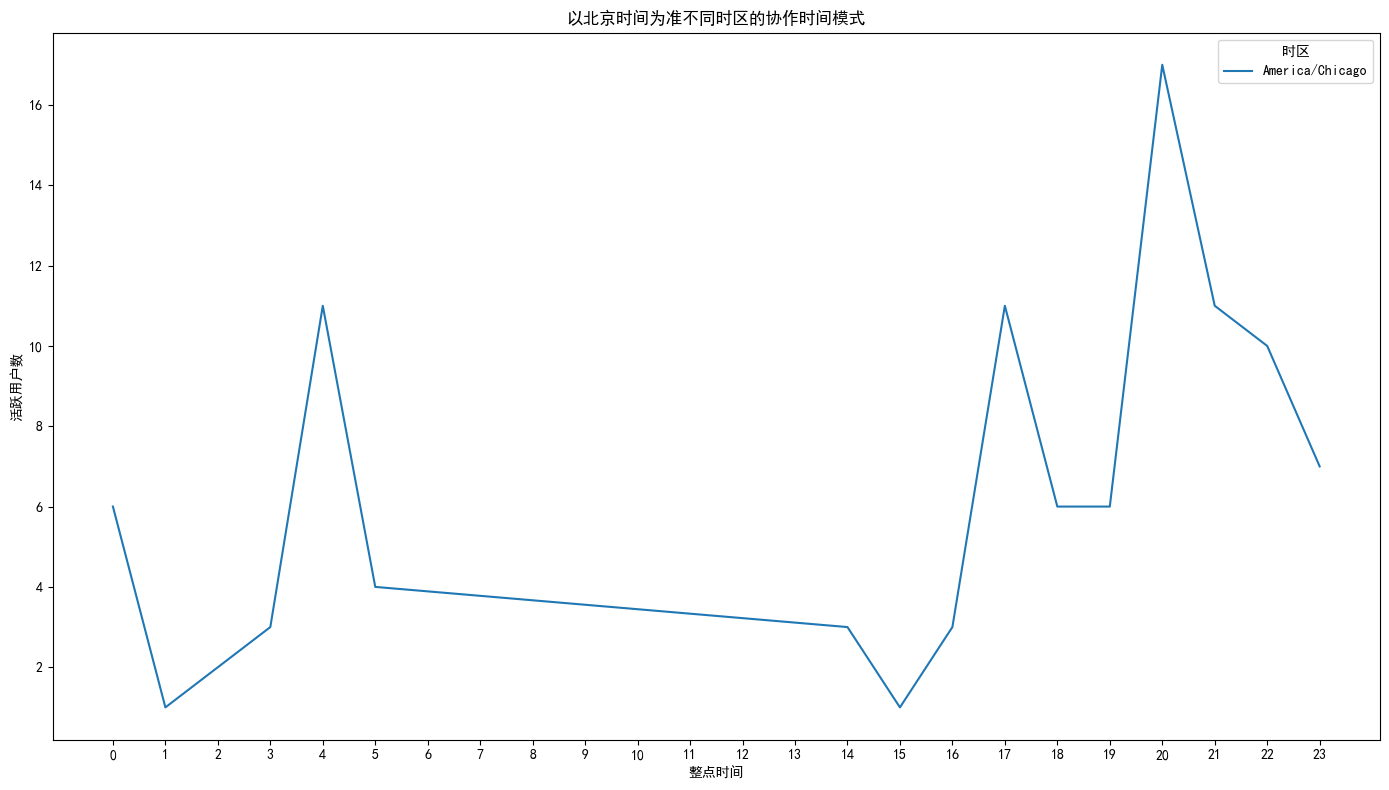

In [19]:
import pandas as pd
from timezonefinder import TimezoneFinder
from geopy.geocoders import Nominatim
import pytz
from datetime import datetime

plt.rcParams['font.sans-serif'] = ['SimHei']
# 假设 data 数据已经包含 'submission_time' 和 'country' 列
# data = pd.read_csv('data/users_combined_info_500.csv', nrows=5)
data = pd.read_csv('data/users_combined_info_500.csv' , nrows=100)
# 使用 Nominatim 获取经纬度
geolocator = Nominatim(user_agent="timezone_locator")

# 根据国家名获取经纬度
def get_coordinates(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# 使用 timezonefinder 获取时区
def get_timezone_from_coordinates(lat, lon):
    if lat and lon:
        tf = TimezoneFinder()
        timezone_str = tf.timezone_at(lng=lon, lat=lat)
        return timezone_str
    return 'UTC'  # 默认返回 UTC 时区

# 获取每个用户的时区
def get_timezone_from_country(country):
    lat, lon = get_coordinates(country)
    timezone = get_timezone_from_coordinates(lat, lon)
    return timezone

# 为每个用户分配时区
data['timezone'] = data['country'].apply(get_timezone_from_country)

# 提取提交时间的小时信息
data['event_time'] = pd.to_datetime(data['event_time'])
data['hour'] = data['event_time'].dt.hour

# 按时区和小时统计活跃度
timezone_hourly_activity = data.groupby(['timezone', 'hour']).size().reset_index(name='activity_count')

# 绘制不同时区的协作时间模式图
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for tz in timezone_hourly_activity['timezone'].unique():
    timezone_data = timezone_hourly_activity[timezone_hourly_activity['timezone'] == tz]
    plt.plot(timezone_data['hour'], timezone_data['activity_count'], label=tz)

plt.title('以北京时间为准不同时区的协作时间模式')
plt.xlabel('整点时间')
plt.ylabel('活跃用户数')
plt.legend(title='时区')
plt.xticks(range(24))
plt.tight_layout()
plt.show()


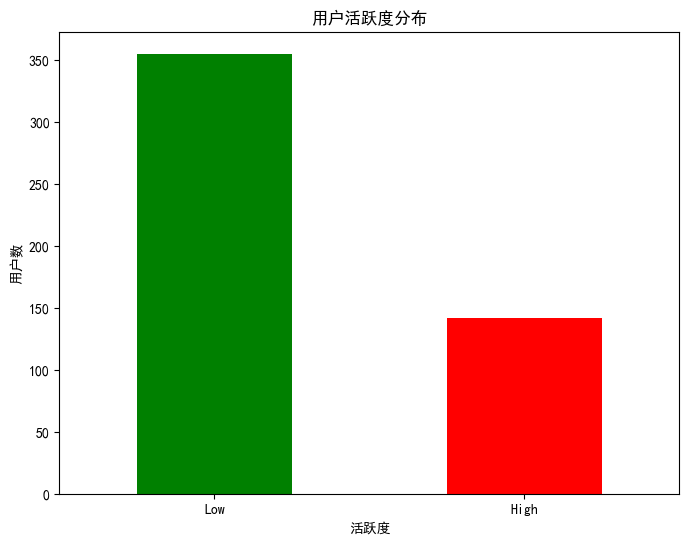

高活跃用户：
       user_id  submission_count activity_level
0          225              2885           High
6        13564              3140           High
8        26967              3214           High
9        27350              4509           High
10       32321              3284           High
..         ...               ...            ...
484   79828097              2615           High
488   86073083              2637           High
489   88161975              3394           High
492   91018726              4098           High
495  100913391              3177           High

[142 rows x 3 columns]
低活跃用户：
       user_id  submission_count activity_level
1         1945              1526            Low
2         2621               796            Low
3         4196              1983            Low
4         9582              2258            Low
5        10682              1703            Low
..         ...               ...            ...
490   88724353              2301            Low
49

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 假设数据已经加载到 'data' 中，并包含 'user_id' 和 'submission_time' 列
data = pd.read_csv('data/users_combined_info_500.csv')

# 统计每个用户的提交次数
user_submission_count = data.groupby('user_id').size().reset_index(name='submission_count')

# 查看每个用户的提交次数
# print(user_submission_count.head())

# 计算所有用户的提交次数的均值
mean_submission_count = user_submission_count['submission_count'].mean()

# 标记高活跃用户和低活跃用户
# 假设高活跃用户提交次数超过均值，低活跃用户提交次数低于均值
user_submission_count['activity_level'] = user_submission_count['submission_count'].apply(
    lambda x: 'High' if x > mean_submission_count else 'Low'
)

# 查看结果
# print(user_submission_count)

# 可选：将高活跃用户和低活跃用户分别筛选出来
high_activity_users = user_submission_count[user_submission_count['activity_level'] == 'High']
low_activity_users = user_submission_count[user_submission_count['activity_level'] == 'Low']

# 统计不同活跃度的用户数量
activity_counts = user_submission_count['activity_level'].value_counts()

# 绘制条形图
plt.figure(figsize=(8, 6))
activity_counts.plot(kind='bar', color=['green', 'red'])
plt.title('用户活跃度分布')
plt.xlabel('活跃度')
plt.ylabel('用户数')
plt.xticks(rotation=0)
plt.show()

# 打印高活跃和低活跃用户的信息
print("高活跃用户：")
print(high_activity_users)
print("低活跃用户：")
print(low_activity_users)


In [25]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('data/users_combined_info_500.csv')

# 转换 event_time 为 datetime 格式
df['event_time'] = pd.to_datetime(df['event_time'])

# 1. 用户活跃度分析

# 每日活跃用户数
daily_active_users = df.groupby(df['event_time'].dt.date)['user_id'].nunique()

# 用户在短时间内触发多次 CreateEvent
frequent_users = df[df['event_type'] == 'CreateEvent'].groupby('user_id').filter(lambda x: len(x) > 1)

print(daily_active_users)
print(frequent_users)
# 2. 地域和国家分析

# 按地区和国家分组，查看不同地区的活跃度
location_activity = df.groupby('location')['user_id'].nunique()

# 按国家分组，查看不同国家的活跃度
country_activity = df.groupby('country')['user_id'].nunique()

# 特定地区的事件频率
us_events = df[df['country'] == 'United States'].groupby('event_type')['user_id'].count()

print(location_activity)
print(country_activity)

# 3. 事件行为分析

# 事件类型分析
event_type_counts = df['event_type'].value_counts()

# 事件操作分析
event_action_counts = df['event_action'].value_counts()

print(event_type_counts)
print(event_action_counts)

# 4. 用户影响力分析

# 高影响力用户（按影响力排序）
high_influence_users = df.groupby('user_id')['total_influence'].max().sort_values(ascending=False)

# 影响力变化（假设我们计算每个用户在不同时间的影响力变化）
df_sorted = df.sort_values(by=['user_id', 'event_time'])
df_sorted['influence_change'] = df_sorted.groupby('user_id')['total_influence'].diff()

print(high_influence_users)

# 5. 时间趋势分析

# 用户活跃时间段分析
df['hour'] = df['event_time'].dt.hour
hourly_activity = df.groupby('hour')['user_id'].nunique()

# 事件的季节性或周期性趋势
monthly_activity = df.groupby(df['event_time'].dt.to_period('M'))['user_id'].nunique()

print(hourly_activity)
print(monthly_activity)



# 6. 事件频次与时间间隔

# 计算用户事件间隔
df_sorted['event_time_diff'] = df_sorted.groupby('user_id')['event_time'].diff().dt.total_seconds()

# 查看间隔较短或较长的用户事件
short_interval_users = df_sorted[df_sorted['event_time_diff'] < 3600]  # 1小时内
long_interval_users = df_sorted[df_sorted['event_time_diff'] > 86400]  # 超过1天

# 输出相关结果

print(short_interval_users)


event_time
2024-10-01    43
2024-10-02    42
2024-10-03    41
2024-10-04    42
2024-10-05    39
              ..
2024-11-26    42
2024-11-27    41
2024-11-28    39
2024-11-29    39
2024-11-30    39
Name: user_id, Length: 61, dtype: int64
        user_id        name                   location  total_influence  \
0        663432      bdraco                Houston, TX      1776.967163   
1        663432      bdraco                Houston, TX      1776.967163   
2        663432      bdraco                Houston, TX      1776.967163   
3        663432      bdraco                Houston, TX      1776.967163   
4        663432      bdraco                Houston, TX      1776.967163   
...         ...         ...                        ...              ...   
193439  1486634  maxdeviant  The Nearest Event Horizon       697.803040   
193440  1486634  maxdeviant  The Nearest Event Horizon       697.803040   
193441  1486634  maxdeviant  The Nearest Event Horizon       697.803040   
193442  1486

C:\Users\23162\AppData\Local\Temp\ipykernel_9432\1832432204.py:62: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_activity = df.groupby(df['event_time'].dt.to_period('M'))['user_id'].nunique()


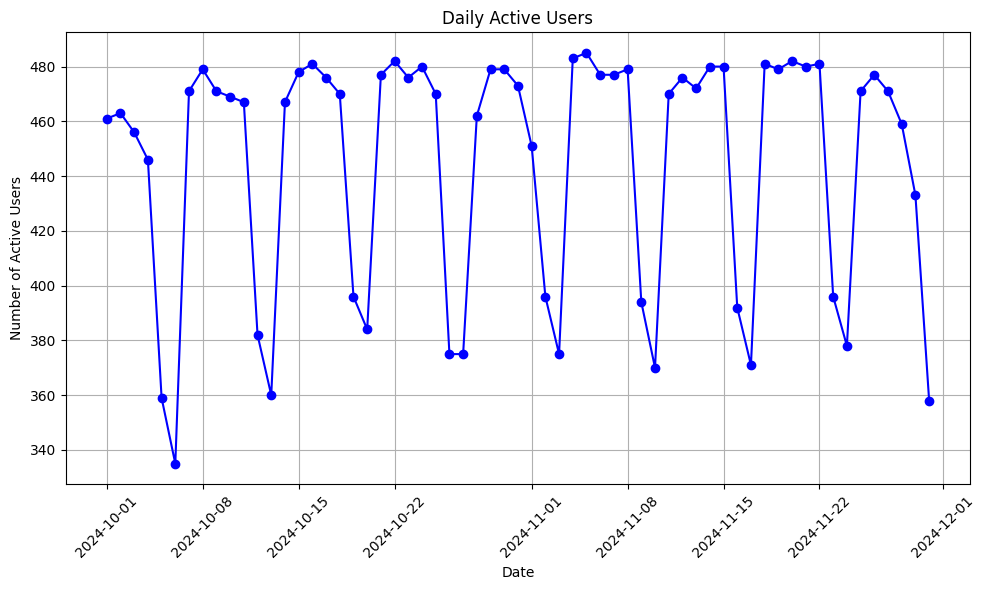

C:\Users\23162\AppData\Local\Temp\ipykernel_15256\481903110.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_activity.index, y=location_activity.values, palette='viridis')
C:\Users\23162\AppData\Local\Temp\ipykernel_15256\481903110.py:35: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\23162\AppData\Local\Temp\ipykernel_15256\481903110.py:35: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\23162\AppData\Local\Temp\ipykernel_15256\481903110.py:35: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\23162\AppData\Local\Temp\ipykernel_15256\481903110.py:35: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from 

C:\Users\23162\AppData\Local\Temp\ipykernel_15256\481903110.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_activity.index, y=country_activity.values, palette='viridis')


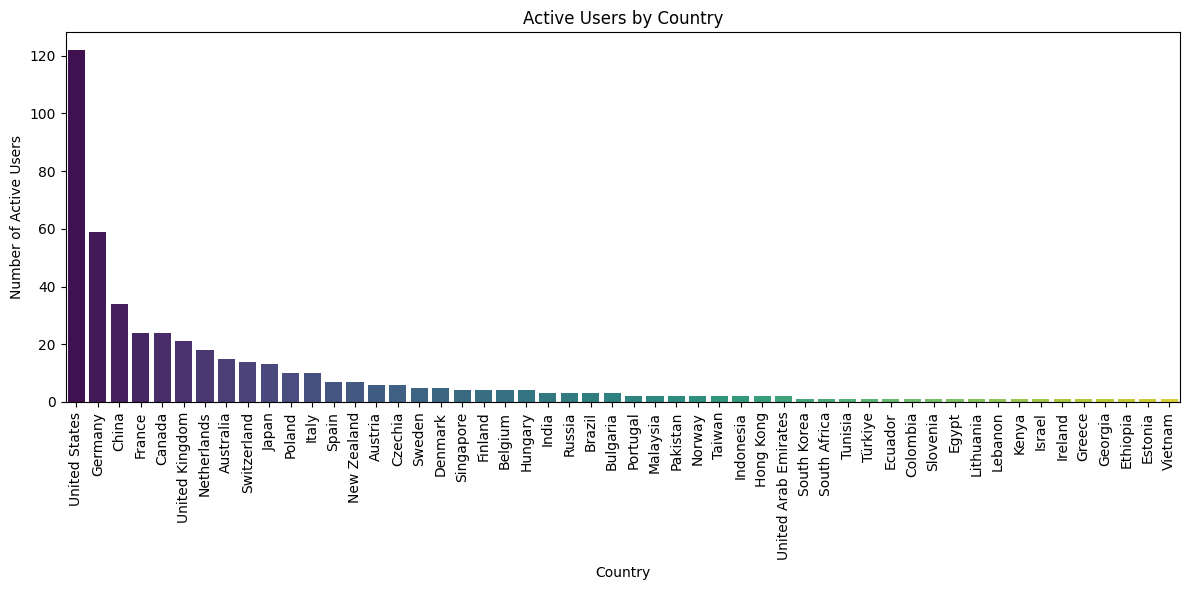

C:\Users\23162\AppData\Local\Temp\ipykernel_15256\481903110.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_type_counts.index, y=event_type_counts.values, palette='coolwarm')


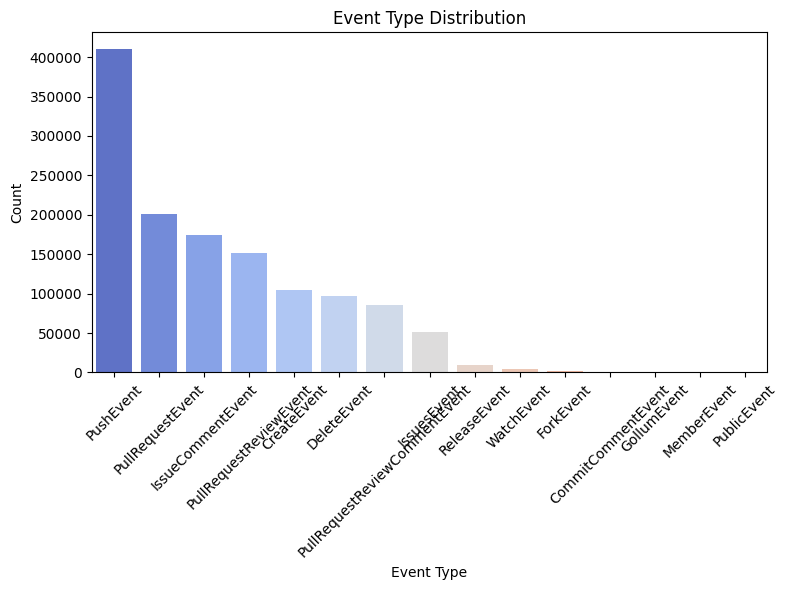

C:\Users\23162\AppData\Local\Temp\ipykernel_15256\481903110.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_influence_users.index.astype(str), y=high_influence_users.values, palette='Blues')


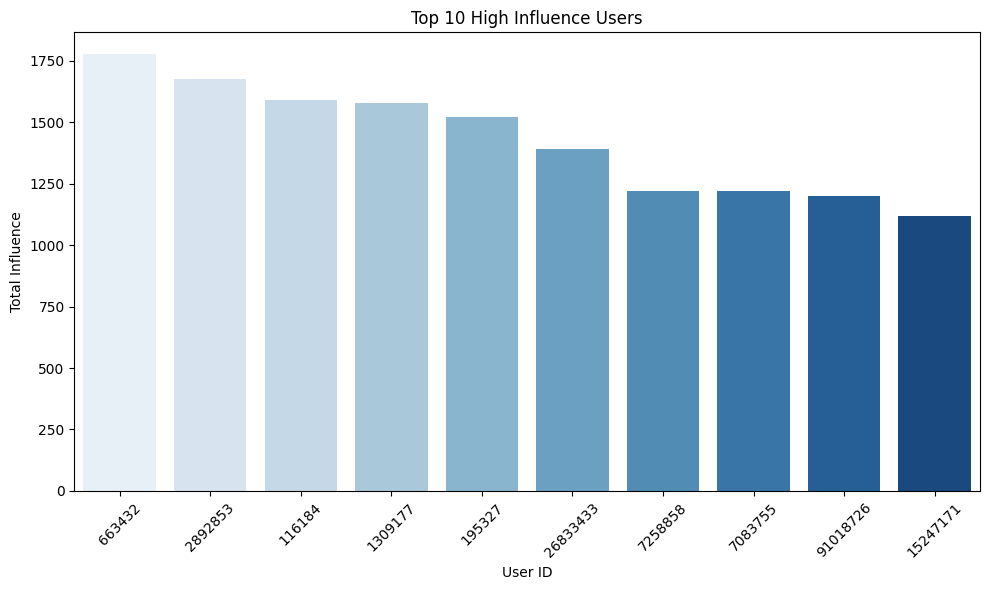

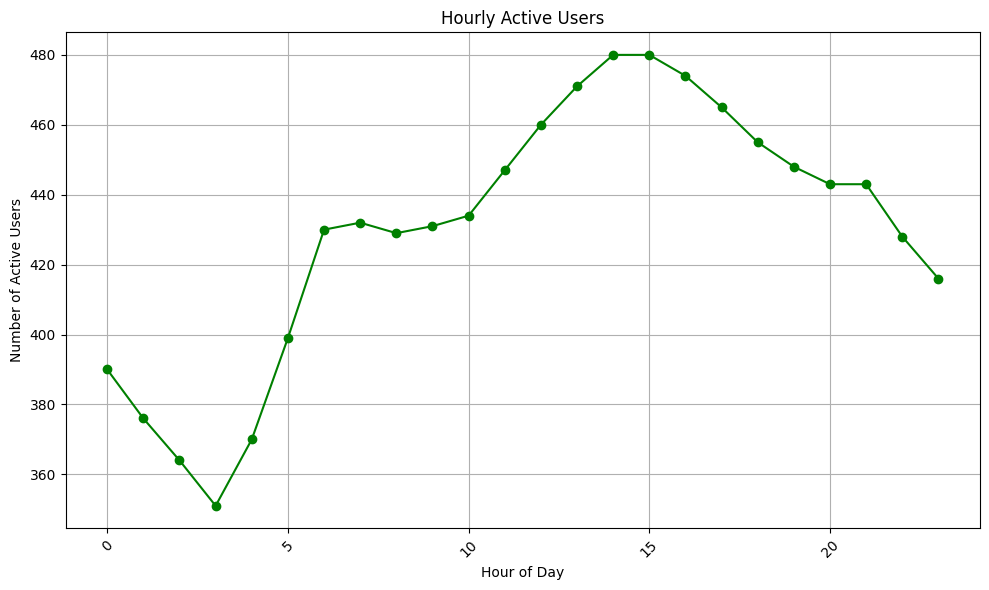

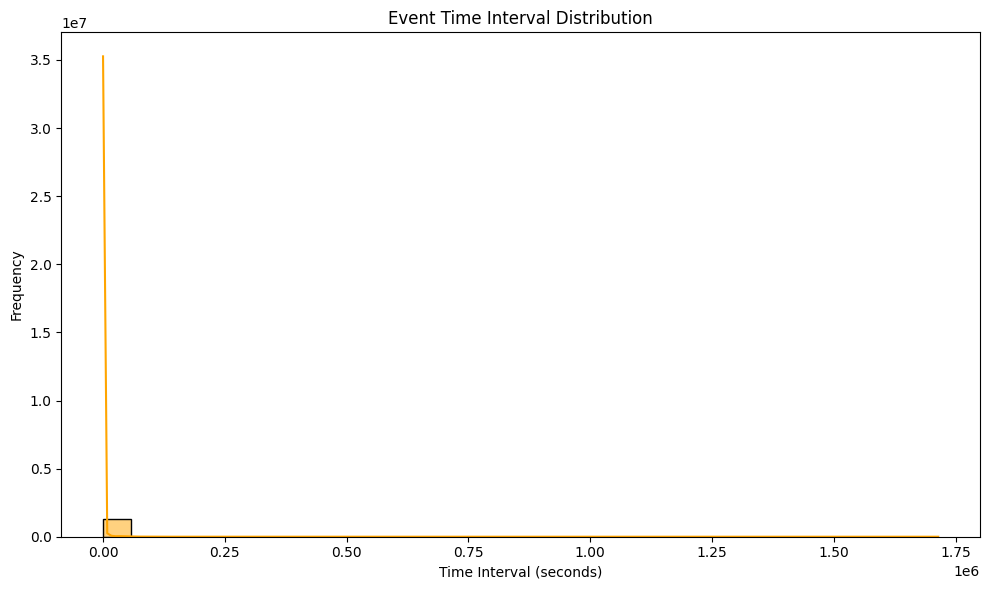

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
df = pd.read_csv('data/users_combined_info_500.csv')

# 转换 event_time 为 datetime 格式
df['event_time'] = pd.to_datetime(df['event_time'])

# 1. 用户活跃度分析：每日活跃用户数
daily_active_users = df.groupby(df['event_time'].dt.date)['user_id'].nunique()

# 可视化：每日活跃用户数
plt.figure(figsize=(10, 6))
daily_active_users.plot(kind='line', marker='o', color='b', title='Daily Active Users')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 地域和国家分析：按地区和国家分组的活跃度
location_activity = df.groupby('location')['user_id'].nunique().sort_values(ascending=False)
country_activity = df.groupby('country')['user_id'].nunique().sort_values(ascending=False)

# 可视化：地区用户活跃度
plt.figure(figsize=(120, 60))
sns.barplot(x=location_activity.index, y=location_activity.values, palette='viridis')
plt.title('Active Users by Location')
plt.xlabel('Location')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 可视化：国家用户活跃度
plt.figure(figsize=(12, 6))
sns.barplot(x=country_activity.index, y=country_activity.values, palette='viridis')
plt.title('Active Users by Country')
plt.xlabel('Country')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. 事件行为分析：事件类型分布
event_type_counts = df['event_type'].value_counts()

# 可视化：事件类型分布
plt.figure(figsize=(8, 6))
sns.barplot(x=event_type_counts.index, y=event_type_counts.values, palette='coolwarm')
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. 用户影响力分析：高影响力用户
high_influence_users = df.groupby('user_id')['total_influence'].max().sort_values(ascending=False).head(10)

# 可视化：高影响力用户
plt.figure(figsize=(10, 6))
sns.barplot(x=high_influence_users.index.astype(str), y=high_influence_users.values, palette='Blues')
plt.title('Top 10 High Influence Users')
plt.xlabel('User ID')
plt.ylabel('Total Influence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. 时间趋势分析：小时活跃用户数
df['hour'] = df['event_time'].dt.hour
hourly_activity = df.groupby('hour')['user_id'].nunique()

# 可视化：小时活跃用户数
plt.figure(figsize=(10, 6))
hourly_activity.plot(kind='line', marker='o', color='g', title='Hourly Active Users')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 6. 事件频次与时间间隔：事件时间间隔分布
df_sorted = df.sort_values(by=['user_id', 'event_time'])
df_sorted['event_time_diff'] = df_sorted.groupby('user_id')['event_time'].diff().dt.total_seconds()

# 可视化：事件间隔分布
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['event_time_diff'], bins=30, kde=True, color='orange')
plt.title('Event Time Interval Distribution')
plt.xlabel('Time Interval (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
# 用户行为聚类分析（简单示例：基于影响力和事件类型）
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 读取CSV文件
df = pd.read_csv('data/users_combined_info_500.csv')

# 转换 event_time 为 datetime 格式
df['event_time'] = pd.to_datetime(df['event_time'])

# 选择用于聚类的特征（影响力和事件类型数量）
event_type_dummies = pd.get_dummies(df['event_type'])
df_cluster = df[['user_id', 'total_influence']].drop_duplicates()
df_cluster = pd.concat([df_cluster, event_type_dummies], axis=1)

# 处理缺失值：使用SimpleImputer进行填充
imputer = SimpleImputer(strategy='mean')
df_cluster_imputed = imputer.fit_transform(df_cluster)

# 标准化数据
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster_imputed)

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)

print(df_cluster.head())

         user_id  total_influence  CommitCommentEvent  CreateEvent  \
0       663432.0      1776.967163               False         True   
10764  2892853.0      1674.805908               False         True   
14641   116184.0      1590.152954               False         True   
19386  1309177.0      1580.198242               False         True   
24880   195327.0      1520.352173               False         True   

       DeleteEvent  ForkEvent  GollumEvent  IssueCommentEvent  IssuesEvent  \
0            False      False        False              False        False   
10764        False      False        False              False        False   
14641        False      False        False              False        False   
19386        False      False        False              False        False   
24880        False      False        False              False        False   

       MemberEvent  PublicEvent  PullRequestEvent  \
0            False        False             False   
1076

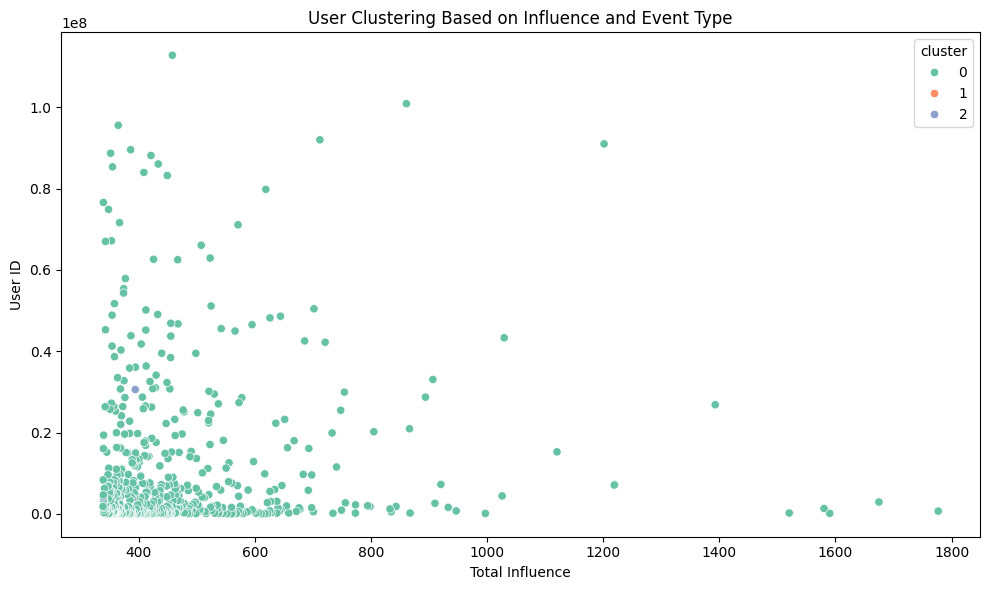

In [7]:
# 用户行为聚类分析：聚类分布
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 读取CSV文件
df = pd.read_csv('data/users_combined_info_500.csv')

# 转换 event_time 为 datetime 格式
df['event_time'] = pd.to_datetime(df['event_time'])

# 选择用于聚类的特征（影响力和事件类型数量）
event_type_dummies = pd.get_dummies(df['event_type'])
df_cluster = df[['user_id', 'total_influence']].drop_duplicates()
df_cluster = pd.concat([df_cluster, event_type_dummies], axis=1)

# 处理缺失值：使用SimpleImputer进行填充
imputer = SimpleImputer(strategy='mean')
df_cluster_imputed = imputer.fit_transform(df_cluster)

# 标准化数据
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster_imputed)

# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# 可视化：用户聚类分布
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_influence', y='user_id', hue='cluster', palette='Set2', data=df_cluster)
plt.title('User Clustering Based on Influence and Event Type')
plt.xlabel('Total Influence')
plt.ylabel('User ID')
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('data/users_combined_info_500.csv')

# 创建报告
report = {}

# 数据概述
report['概述'] = df.describe(include='all').T

# 检查缺失值
report['缺失值'] = df.isnull().sum()

# 检查重复行
report['重复行'] = df.duplicated().sum()

# 数据类型
report['数据类型'] = df.dtypes

# 查看前5行数据
report['前5行'] = df.head()

# 保存报告为文本文件
with open('data_report.txt', 'w', encoding='utf-8') as f:
    for key, value in report.items():
        f.write(f'{key}:\n{value}\n\n')
